<h1> <strong> Subida del dataset comprimido

In [ ]:
from google.colab import files
import os
import zipfile

# Subir archivo comprimido
uploaded = files.upload()

# Extracción del contenido
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content')
        print(f'{filename} extraído en /content')


Saving data_minas.zip to data_minas.zip
data_minas.zip extraído en /content


<h1> <strong> Intregacion de zona y profundidad de la mina al nombre de cada imagen

In [ ]:
import shutil

def rename_images_in_folder(base_path):
    # Recorrer las subcarpetas por fecha
    for date_folder in os.listdir(base_path):
        date_folder_path = os.path.join(base_path, date_folder)

        if os.path.isdir(date_folder_path):
            # Recorrer las subcarpetas JPG y R_JPG
            for subfolder in ['JPG', 'R_JPG']:
                subfolder_path = os.path.join(date_folder_path, subfolder)

                if os.path.isdir(subfolder_path):
                    # Recorrer las carpetas de zona (Zone 1 Mine 1cm depth, etc.)
                    for zone_folder in os.listdir(subfolder_path):
                        zone_folder_path = os.path.join(subfolder_path, zone_folder)

                        if os.path.isdir(zone_folder_path):
                            # Obtener el nombre de la zona y la profundidad
                            zone_info = zone_folder.split(" ")
                            zone_name = f"Zone{zone_info[1]}_{zone_info[2]}_{zone_info[3]}"

                            # Recorrer las imágenes dentro de la zona
                            for img_name in os.listdir(zone_folder_path):
                                img_path = os.path.join(zone_folder_path, img_name)

                                if img_name.endswith('.jpg') or img_name.endswith('.jpeg'):
                                    # Crear el nuevo nombre
                                    new_name = f"{zone_name}_{img_name}"
                                    new_path = os.path.join(zone_folder_path, new_name)

                                    # Renombrar la imagen
                                    shutil.move(img_path, new_path)
                                    print(f'Renombrada: {img_path} a {new_path}')

# Suponiendo que la carpeta principal esté en /content
base_path = '/content/data_minas'
rename_images_in_folder(base_path)


Renombrada: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/FlightAltitude__2.5m_TemperatureInCenter__33°C.jpg a /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__2.5m_TemperatureInCenter__33°C.jpg
Renombrada: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/FlightAltitude__5.4m_TemperatureInCenter__34°C.jpg a /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__5.4m_TemperatureInCenter__34°C.jpg
Renombrada: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/FlightAltitude__1.7m_TemperatureInCenter__30°C.jpg a /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__1.7m_TemperatureInCenter__30°C.jpg
Renombrada: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/FlightAltitude__6.5m_TemperatureInCenter__34°C.jpg a /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__6.5m_TemperatureInCenter__34°C.jpg
Renombrada: /content/data_minas/03_03_2020/JPG/Zone 6  free zone

<h1> <strong> Clasificación de imagenes en mina y no_mina

In [ ]:
import os
import shutil

def classify_images(base_path, output_dir):
    # Crear las carpetas de salida (mina y no_mina)
    mina_dir = os.path.join(output_dir, 'mina')
    no_mina_dir = os.path.join(output_dir, 'no_mina')

    os.makedirs(mina_dir, exist_ok=True)
    os.makedirs(no_mina_dir, exist_ok=True)

    # Contadores para las imágenes
    mina_count = 0
    no_mina_count = 0

    # Lista de zonas que van a "mina"
    mina_zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 7', 'Zone 8', 'Zone 9']

    # Recorrer las subcarpetas por fecha
    for date_folder in os.listdir(base_path):
        date_folder_path = os.path.join(base_path, date_folder)

        if os.path.isdir(date_folder_path):
            # Recorrer las subcarpetas JPG y R_JPG
            for subfolder in ['JPG', 'R_JPG']:
                subfolder_path = os.path.join(date_folder_path, subfolder)

                if os.path.isdir(subfolder_path):
                    # Recorrer las carpetas de zona
                    for zone_folder in os.listdir(subfolder_path):
                        zone_folder_path = os.path.join(subfolder_path, zone_folder)

                        if os.path.isdir(zone_folder_path):
                            # Comprobar si la zona está en mina o no_mina
                            if any(zone_folder.startswith(zone) for zone in mina_zones):
                                target_folder = mina_dir
                                mina_count += 1
                            elif 'Zone 6' in zone_folder:
                                target_folder = no_mina_dir
                                no_mina_count += 1
                            else:
                                continue  # Si no es zona 6 ni una de mina, lo ignoramos

                            # Recorrer las imágenes dentro de la zona
                            for img_name in os.listdir(zone_folder_path):
                                img_path = os.path.join(zone_folder_path, img_name)

                                if img_name.endswith('.jpg') or img_name.endswith('.jpeg'):
                                    # Verificar si la imagen ya existe en el destino
                                    target_img_path = os.path.join(target_folder, img_name)
                                    counter = 1

                                    # Si la imagen ya existe, agregar un número para evitar sobrescritura
                                    while os.path.exists(target_img_path):
                                        name, ext = os.path.splitext(img_name)
                                        target_img_path = os.path.join(target_folder, f"{name}_{counter}{ext}")
                                        counter += 1

                                    # Mover la imagen a la carpeta de destino
                                    shutil.move(img_path, target_img_path)
                                    print(f'Movida: {img_path} a {target_img_path}')

    # Imprimir el número de imágenes en cada carpeta
    print(f"Total de imágenes en 'mina': {mina_count}")
    print(f"Total de imágenes en 'no_mina': {no_mina_count}")

# Especifica la ruta de la carpeta base y la carpeta de salida
base_path = '/content/data_minas'  # Cambia esto si es necesario
output_dir = '/content/data_landmine'

# Llamamos a la función para clasificar las imágenes
classify_images(base_path, output_dir)

Movida: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__8.3m_TemperatureInCenter__34°C.jpg a /content/data_landmine/no_mina/Zone6__free_FlightAltitude__8.3m_TemperatureInCenter__34°C.jpg
Movida: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__7.3m_TemperatureInCenter__33°C.jpg a /content/data_landmine/no_mina/Zone6__free_FlightAltitude__7.3m_TemperatureInCenter__33°C.jpg
Movida: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__5.4m_TemperatureInCenter__34°C.jpg a /content/data_landmine/no_mina/Zone6__free_FlightAltitude__5.4m_TemperatureInCenter__34°C.jpg
Movida: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__2.5m_TemperatureInCenter__33°C.jpg a /content/data_landmine/no_mina/Zone6__free_FlightAltitude__2.5m_TemperatureInCenter__33°C.jpg
Movida: /content/data_minas/03_03_2020/JPG/Zone 6  free zone/Zone6__free_FlightAltitude__9.8m_TemperatureInCenter__34°C.

<h2> <strong> Subida del dataset

In [ ]:
!pip install huggingface_hub

In [ ]:
!pip install datasets

In [ ]:
!pip install -U datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [ ]:
from huggingface_hub import login

# Iniciar sesión en Hugging Face
login()

In [ ]:
from datasets import Dataset, Features, ClassLabel, Image, Value
import os

# Ruta de las carpetas de imágenes
data_dir = '/content/data_landmine'

# Crear una lista de diccionarios con los datos
data = {'image': [], 'label': [], 'filename': []}

# Mapeo de etiquetas a binarios
label_map = {'mina': 0, 'no_mina': 1}

# Cargar imágenes y etiquetas
for label in ['mina', 'no_mina']:
    label_dir = os.path.join(data_dir, label)
    for filename in os.listdir(label_dir):
        if filename.endswith(".jpg"):
            # Ruta completa de la imagen
            img_path = os.path.join(label_dir, filename)

            # Leer la imagen y convertirla a formato adecuado para Hugging Face
            with open(img_path, "rb") as img_file:
                img_bytes = img_file.read()

            # Agregar los datos al dataset
            data['image'].append(img_bytes)  # Guardar la imagen como bytes
            data['label'].append(label_map[label])  # Usar la etiqueta binaria
            data['filename'].append(filename)  # Guardar el nombre del archivo

# Definir las características del dataset usando Features
features = Features({
    'image': Image(),
    'label': ClassLabel(names=['mina', 'no_mina']),  # Definimos las clases explícitamente
    'filename': Value('string')
})

# Crear el dataset
dataset = Dataset.from_dict(data, features=features)

# Subir el dataset a Hugging Face
dataset.push_to_hub("dataset_landmine", private=False)


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1301 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

Uploading...:   0%|          | 0.00/196M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/JeiGeek/dataset_landmine/commit/f8621b92ddff51825919c2aaeb17134778e89517', commit_message='Upload dataset', commit_description='', oid='f8621b92ddff51825919c2aaeb17134778e89517', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/JeiGeek/dataset_landmine', endpoint='https://huggingface.co', repo_type='dataset', repo_id='JeiGeek/dataset_landmine'), pr_revision=None, pr_num=None)

<h1> <strong> Partición de las carpetas en train y test

In [ ]:
dataset = load_dataset("JeiGeek/dataset_landmine")
dataset

README.md:   0%|          | 0.00/429 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/196M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1301 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 1301
    })
})

In [ ]:
# Dividir el dataset 'train' en train y test con un 20% para test
split_dataset = dataset['train'].train_test_split(test_size=0.2, seed=42)

# Mostrar el resultado
print(split_dataset)

# Acceder a los splits resultantes así
train_dataset = split_dataset['train']
test_dataset = split_dataset['test']

print(f"Train size: {len(train_dataset)}")
print(f"Test size: {len(test_dataset)}")

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 1040
    })
    test: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 261
    })
})
Train size: 1040
Test size: 261


<h2> <strong> Subida a HuggingFace

In [ ]:
from huggingface_hub import HfApi

api = HfApi()

# Nombre completo
dataset_repo_id = "JeiGeek/dataset_landmine_particionado"

# Crear el repo de tipo 'dataset'
api.create_repo(repo_id=dataset_repo_id, repo_type="dataset", exist_ok=True)
print(f"Repositorio '{dataset_repo_id}' creado")

Repositorio 'JeiGeek/dataset_landmine_particionado' creado


In [ ]:
split_dataset.push_to_hub("JeiGeek/dataset_landmine_particionado")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1040 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

Uploading...:   0%|          | 0.00/157M [00:00<?, ?B/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading...:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/JeiGeek/dataset_landmine_particionado/commit/1a2ab36a397ae48611800f0ce0c9b6459444311a', commit_message='Upload dataset', commit_description='', oid='1a2ab36a397ae48611800f0ce0c9b6459444311a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/JeiGeek/dataset_landmine_particionado', endpoint='https://huggingface.co', repo_type='dataset', repo_id='JeiGeek/dataset_landmine_particionado'), pr_revision=None, pr_num=None)

In [ ]:
# Carga el dataset particionado desde Hugging Face
dataset_loaded = load_dataset("JeiGeek/dataset_landmine_particionado")

print(dataset_loaded)
print(f"Tamaño train: {len(dataset_loaded['train'])}")
print(f"Tamaño test: {len(dataset_loaded['test'])}")

README.md:   0%|          | 0.00/540 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1040 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/261 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 1040
    })
    test: Dataset({
        features: ['image', 'label', 'filename'],
        num_rows: 261
    })
})
Tamaño train: 1040
Tamaño test: 261


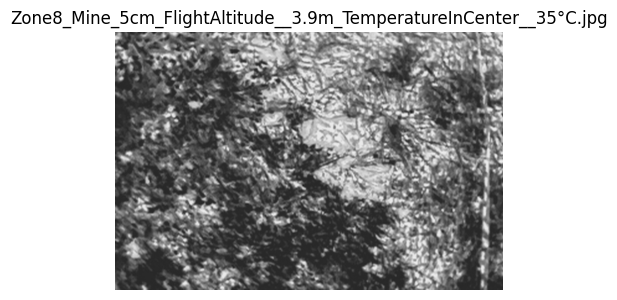

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage


# Obtener la primera imagen y su nombre
image_data = dataset_loaded['train']['image'][0]  # Tomando la primera imagen del dataset
image_name = dataset_loaded['train']['filename'][0]  # Nombre del archivo de la primera imagen

# La imagen ya está en formato PIL, así que no es necesario convertirla
img = image_data

# Crear el gráfico
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.title(image_name)  # Colocar el nombre de la imagen como título
plt.show()
